# Assignment 4

> Submitted By: Bhavya

> Roll No.: 102115003

> Section: 4O1A

#### Study the single neural network for different learning rates.


In [12]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [13]:
np.random.seed(0)
X = np.random.randn(100, 2)  # Features
y = (X[:, 0] + X[:, 1] > 0).astype(int)

In [14]:
class SingleLayerNN:
    def __init__(self, input_size):
        # Initialize weights and bias
        self.weights = np.random.randn(input_size)
        self.bias = 0.0

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))     # Sigmoid activation function

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_output)

    def compute_loss(self, y_true, y_pred):
        m = len(y_true)
        return -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))  # Binary cross-entropy loss

    def train(self, X, y, epochs=1000, learning_rate=0.01):
        # Training loop
        m = X.shape[0]  # Number of samples
        loss_history = []

        for epoch in range(epochs):
            # Forward pass
            y_pred = self.predict(X)

            # Compute loss
            loss = self.compute_loss(y, y_pred)
            loss_history.append(loss)

            # Backward pass (gradient computation)
            dW = (1/m) * np.dot(X.T, (y_pred - y))
            dB = (1/m) * np.sum(y_pred - y)

            # Update weights and bias
            self.weights -= learning_rate * dW
            self.bias -= learning_rate * dB

        return loss_history

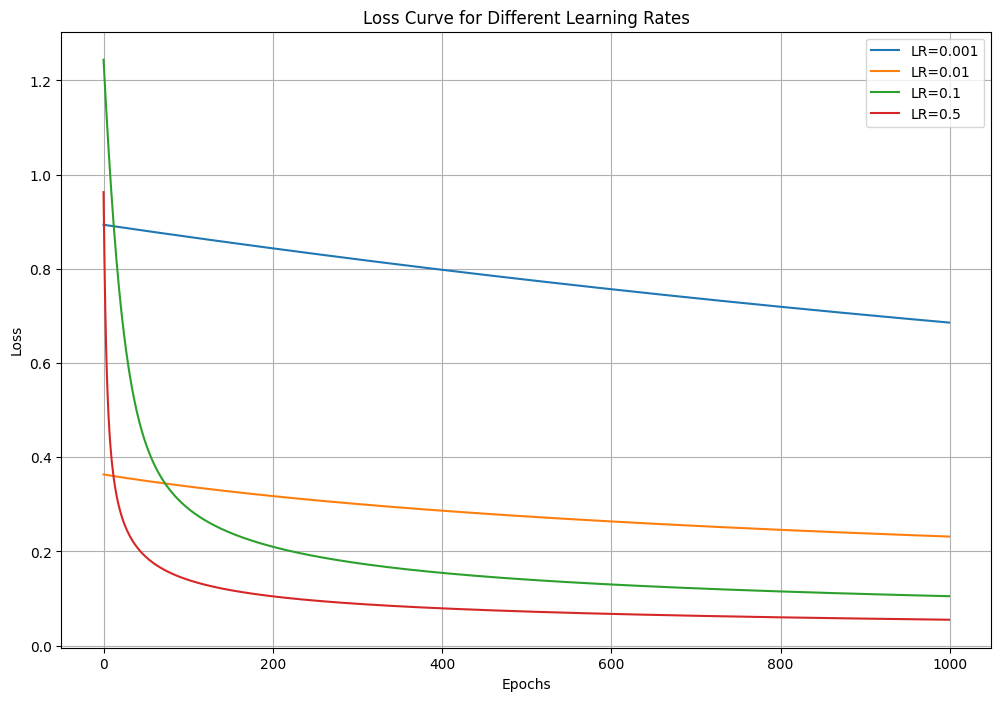

In [15]:
learning_rates = [0.001, 0.01, 0.1, 0.5]  # Different learning rates
epochs = 1000

plt.figure(figsize=(12, 8))
for lr in learning_rates:
    model = SingleLayerNN(input_size=2)
    loss_history = model.train(X, y, epochs=epochs, learning_rate=lr)

    # Plot the loss curve for each learning rate
    plt.plot(loss_history, label=f'LR={lr}')

plt.title('Loss Curve for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
for lr in learning_rates:
    model = SingleLayerNN(input_size=2)
    model.train(X, y, epochs=epochs, learning_rate=lr)
    predictions = model.predict(X)
    predictions = (predictions > 0.5).astype(int)
    accuracy = np.mean(predictions == y)
    print(f"Learning Rate: {lr}, Training Accuracy: {accuracy * 100:.2f}%")

Learning Rate: 0.001, Training Accuracy: 85.00%
Learning Rate: 0.01, Training Accuracy: 97.00%
Learning Rate: 0.1, Training Accuracy: 99.00%
Learning Rate: 0.5, Training Accuracy: 100.00%
